## Artificial Neural Networks

### Arquitectura típica

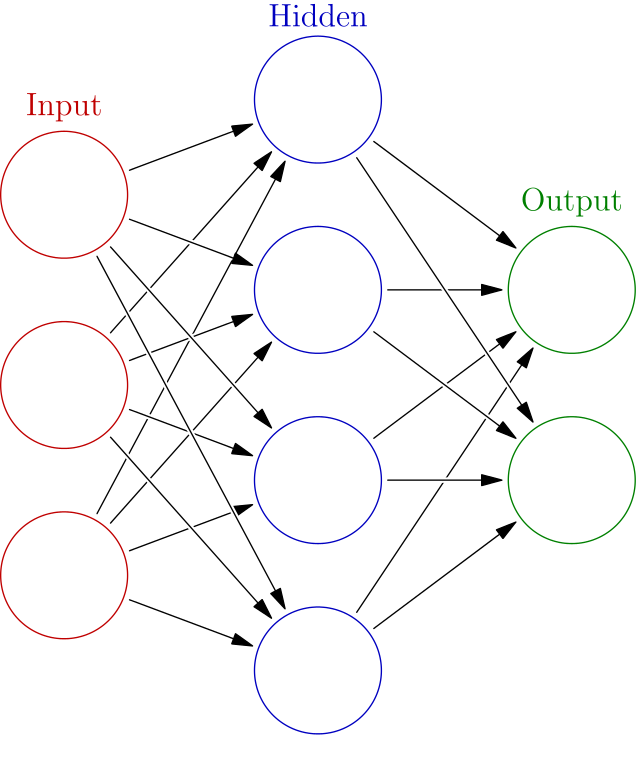

In [1]:
from IPython.display import SVG, display, Image
%matplotlib inline
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/638px-Colored_neural_network.svg.png')

### Función de activación típica
#### Sigmoide
$$ S(t) = \frac{1}{1+e^{-t}}$$

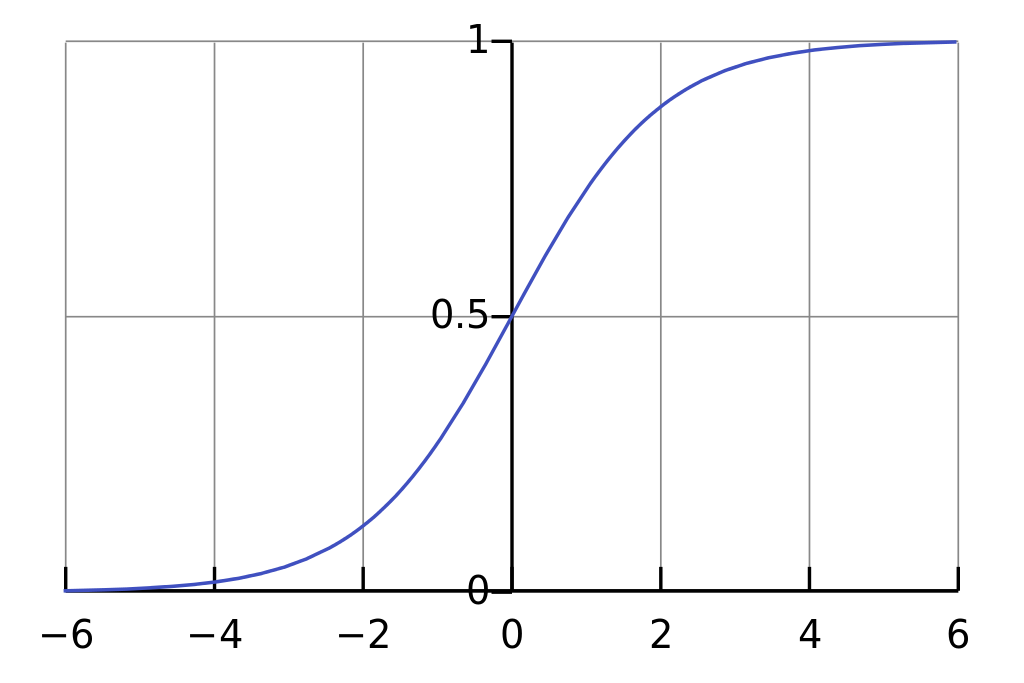

In [2]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1024px-Logistic-curve.svg.png')

## `sklearn`

En `sklearn`sólo se incluye un tipo de ANN, llamadas **Bernoulli Restricted Boltzmann machines**. [http://scikit-learn.org/stable/modules/neural_networks.html#rbm](http://scikit-learn.org/stable/modules/neural_networks.html#rbm)


In [3]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from pandas import read_csv as read_csv
from sklearn.pipeline import Pipeline

df_training = read_csv('data/saturday_traning_sample.csv',header=0)
df_testing = read_csv('data/saturday_testing_sample.csv',header=0)

varnames =["random_forest",
           "nearest_neighbors"]
training_data = df_training.as_matrix(columns=varnames)
training_target = df_training.as_matrix(columns=['is_good'])
# Models we will use
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 1
rbm.n_iter = 100
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 10
logistic.C = 100.0

# Training RBM-Logistic Pipeline
classifier.fit(training_data, training_target.ravel())

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.11, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.23, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.14, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.24, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1.03, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1.15, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1.20, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1.18, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1.16, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1.06, time = 0.01s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1.19, time = 0.01s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1.15, time = 0.01s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1.13, time = 0.01s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1.07, time = 0.01s
[BernoulliRBM] Iteration 15, pseudo-likelih

Pipeline(steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=1, n_components=10, n_iter=100,
       random_state=0, verbose=True)), ('logistic', LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [4]:
testing_data = df_testing.as_matrix(columns=varnames)
df_testing['neural_net']=classifier.predict_proba(testing_data)[:,0]

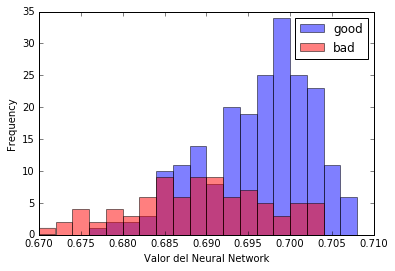

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy import arange, array, delete
nn_scores_range = arange(0.67,0.71,0.002)
df_good = df_testing[df_testing['is_good']==1] 
df_bad = df_testing[df_testing['is_good']!=1]
htest_good = df_good['neural_net'].plot.hist(bins=nn_scores_range,color='b',alpha=0.5,label='good')
htest_bad = df_bad['neural_net'].plot.hist(bins=nn_scores_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Valor del Neural Network')

In [6]:
df_testing.head(10)

,Unnamed: 0,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,...,foreign_worker_numeric,is_good,linnear_score,decision_tree,decision_tree_pred,random_forest,random_forest_pred,nearest_neighbors,nearest_neighbors_pred,neural_net
0,7,2,36,4,4,6948,1,3,2,1,...,1,1,0.643094,1.0,1,0.6900,1,0.9,1,0.696963
1,10,2,12,4,2,1295,1,2,3,2,...,1,2,0.672193,1.0,1,0.7225,1,0.6,1,0.694085
2,15,1,24,4,1,1282,2,3,4,2,...,1,2,0.665924,0.0,2,0.6800,1,0.6,1,0.692555
3,20,4,9,3,2,2134,1,3,4,1,...,1,1,0.757510,1.0,1,0.8625,1,1.0,1,0.704390
4,21,1,6,4,1,2647,3,3,2,1,...,1,1,0.689109,1.0,1,0.7250,1,0.7,1,0.695524
5,22,1,10,3,2,2241,1,2,1,1,...,0,1,0.923323,1.0,1,0.9500,1,0.7,1,0.703501
6,24,4,10,3,3,2069,0,3,2,3,...,0,1,0.962427,1.0,1,0.8900,1,0.8,1,0.702715
7,25,1,6,4,3,1374,1,3,1,1,...,1,1,0.930998,0.0,2,0.8725,1,0.6,1,0.699440
8,26,4,6,0,1,426,1,5,4,3,...,1,1,0.771905,1.0,1,0.4175,2,0.9,1,0.687122
9,28,2,7,4,1,2415,1,3,3,1,...,1,1,0.676908,1.0,1,0.7800,1,0.8,1,0.698827


In [7]:
from bootstrap import bootstrapped_utility
from pandas import DataFrame
bs_f = bootstrapped_utility(df_testing=df_testing,varname='neural_net', bins = nn_scores_range)
bs_df = DataFrame(bs_f)
bs_df = bs_df.transpose()
for n in range(0,100):
    bs_f = bootstrapped_utility(df_testing=df_testing,varname='neural_net', bins = nn_scores_range)
    bs_df_tmp = DataFrame(bs_f)
    bs_df_tmp = bs_df_tmp.transpose()
    bs_df.loc[n]=bs_df_tmp.loc[0]    
bs_results=bs_df.describe()
bs_results.columns=delete(nn_scores_range,-1)
bs_results


,0.67,0.672,0.674,0.676,0.678,0.68,0.682,0.684,0.686,0.688,0.69,0.692,0.694,0.696,0.698,0.7,0.702,0.704,0.706
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11800.00000,18910.000000,35380.000000,70930.000000,82000.00000,107410.000000,122860.000000,157210.000000,176770.000000,165010.000000,168910.000000,201490.000000,136210.000000,85210.00000,-18350.000000,-198110.000000,-301880.000000,-397520.000000,-463220.000000
std,117071.85051,116872.467401,115618.825142,114400.965508,114642.52741,112335.904565,110863.372097,109266.359291,103756.791673,99565.469553,89796.188419,83636.719861,81199.255482,68276.51666,60846.117378,48579.185591,38470.579077,21194.853578,14184.626762
min,-260000.00000,-251000.000000,-233000.000000,-188000.000000,-188000.00000,-173000.000000,-167000.000000,-152000.000000,-101000.000000,-62000.000000,-17000.000000,25000.000000,-62000.000000,-77000.00000,-182000.000000,-314000.000000,-407000.000000,-440000.000000,-488000.000000
25%,-50000.00000,-42500.000000,-32000.000000,1750.000000,12250.00000,35500.000000,46000.000000,97000.000000,126250.000000,109000.000000,94000.000000,133000.000000,76000.000000,44500.00000,-59750.000000,-233750.000000,-323750.000000,-410000.000000,-476000.000000
50%,-5000.00000,13000.000000,34000.000000,73000.000000,88000.00000,118000.000000,133000.000000,157000.000000,178000.000000,172000.000000,173500.000000,209500.000000,146500.000000,89500.00000,-20000.000000,-191000.000000,-302000.000000,-398000.000000,-464000.000000
75%,85000.00000,87250.000000,103000.000000,133750.000000,148000.00000,172750.000000,184000.000000,221500.000000,236500.000000,226000.000000,229000.000000,263500.000000,193000.000000,130000.00000,28000.000000,-164000.000000,-280250.000000,-386000.000000,-452000.000000
max,280000.00000,298000.000000,307000.000000,361000.000000,388000.00000,427000.000000,439000.000000,466000.000000,448000.000000,406000.000000,367000.000000,364000.000000,325000.000000,241000.00000,103000.000000,-80000.000000,-194000.000000,-332000.000000,-428000.000000


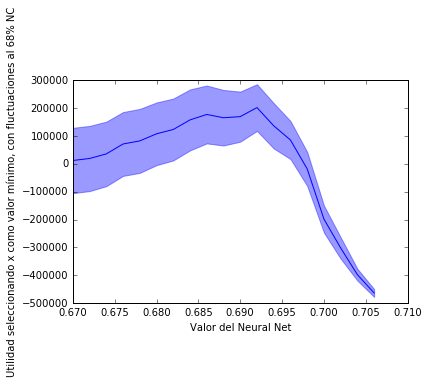

In [8]:
bs_mean = bs_results.loc['mean',]
bs_std = bs_results.loc['std',]
plt.plot(nn_scores_range[:(len(bs_mean))], bs_mean, 'k', color='blue')
plt.fill_between(nn_scores_range[:(len(bs_mean))], bs_mean-bs_std, bs_mean+bs_std,
    alpha=0.4, edgecolor='blue', facecolor='blue')
plt.xlabel('Valor del Neural Net')
plt.ylabel('Utilidad seleccionando x como valor mínimo, con fluctuaciones al 68% NC')

## Retos:

* Entrenar una red neuronal con variables no categóricas. (Hay que redefinirlas para que vayan de (0,1))
* Encontrar el monto promedio del préstamo por bin del modelo de NN, y con eso recalcular las ganancias.
